Testing the icestream

In [29]:
%load_ext autoreload
%autoreload 2
%aimport -fenics
%aimport -numpy 
%aimport -matplotlib
from fenics import *
import settings
import solution_io
import numpy as np
import matplotlib.pyplot as plt
import crosssection


[autoreload of crosssection failed: Traceback (most recent call last):
  File "/home/ag/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/ag/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/ag/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/ag/boxyicestream/code/crosssection.py", line 105
    tau = ice_physics.tau_orthotropic(eps, AE, n, 1, 1, 1, 1, E_spatial, 1):
         

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
#run experiments
experiments = []
experiments += [settings.experiment()]
experiments += [settings.experiment(name='wider_icestream',icestream_width=50100)]
#experiments += [settings.experiment(name='softer_margin',shearmargin_enhancement=9)]
#experiments += [settings.experiment(name='softer_margin_1',shearmargin_enhancement=9,shearmargin_enhancement_pos=23000)]
experiments += [settings.experiment(name='softer_margin_2',shearmargin_enhancement=9,shearmargin_enhancement_pos=23100)]
experiments += [settings.experiment(name='thicker_icestream',domain_h=2010)]

for experiment in experiments:
    print(experiment['name'])
    crosssection.run_experiment(experiment)

control

Running 2d experiment:  control
{}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 4 iterations and 4 linear solver iterations.
saving to  ../output//2d_control.h5
wider_icestream

Running 2d experiment:  wider_icestream
{'icestream_width': 50100, 'name': 'wider_icestream'}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 4 iterations and 4 linear solver iterations.
saving to  ../output//2d_wider_icestream.h5
softer_margin_1

Running 2d experiment:  softer_margin_1
{'name': 'softer_margin_1',
 'shearmargin_enhancement': 9,
 'shearmargin_enhancement_pos': 22900}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 4 iterations and 4 linear solver iterations.
saving to  ../output//2d_softer_margin_1.h5
softer_margin_2

Running 2d experiment:  softer_margin_2
{'name': 'softer_margin_2',
 'shearmargin_enhancement': 9,
 'shea

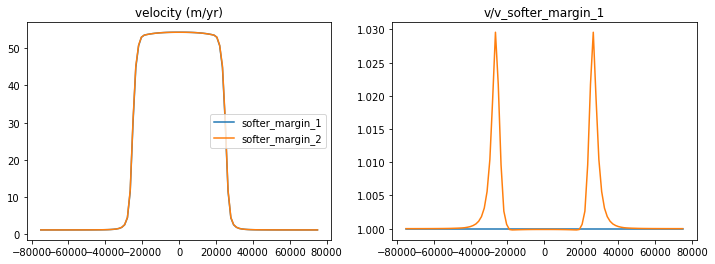

In [31]:

yr2sec = 365.25*24*60*60




w = experiments[0]['domain_w']
x= np.linspace(-w/2,w/2,100)
#x= np.linspace(8e3,12e3,100)

def loadex(experiment):
    fname = settings.filename2d(experiment)
    results = solution_io.load_solution(fname)
    #mesh = results['mesh']
    usol = results['u']
    vfun = usol.sub(2)
    #psol = results['p']
    experiment = results['experiment']
    domain_h = experiment["domain_h"]
    v = np.empty(x.shape)
    for ix in range(len(x)):
        v[ix] = vfun(np.abs(x[ix]),domain_h)
    return v

ref_experiment = experiments[2];
v0 = loadex(ref_experiment)


plt.rcParams['figure.figsize']=(12,4)
f,ax = plt.subplot_mosaic('AB')
for experiment in experiments:
    if experiment["shearmargin_enhancement"]!=ref_experiment["shearmargin_enhancement"]:
        continue
    v = loadex(experiment)
    ax['A'].plot(x,v*yr2sec,label=experiment['name'])
    ax['B'].plot(x,v/v0,label=experiment['name'])


ax['A'].legend()
ax['A'].set_title('velocity (m/yr)')
ax['B'].set_title(f'v/v_{ref_experiment["name"]}');

Object cannot be plotted directly, projecting to piecewise linears.


(1.2246467991473533e-12, 75000.0, 0.0, 2000.0)

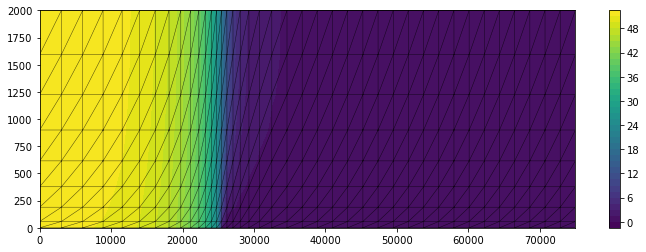

In [32]:
fname = settings.filename2d(experiments[0])
results = solution_io.load_solution(fname)
#mesh = results['mesh']
usol = results['u']
vfun = usol.sub(2)*yr2sec
h=plot(vfun)
plt.colorbar(h)
plot(results['mesh'],linewidth=0.5,color='k',alpha=0.7)
plt.axis('auto')


In [33]:
icestream_w = experiment['icestream_width']
domain_w = experiment['domain_w']
x=np.array([-domain_w/2,-icestream_w,-icestream_w/2,0,icestream_w/2,icestream_w,domain_w/2])
cellwidth = np.array(10,5,1,5,1,5,10)
np.interp1(x,cellwidth,)

TypeError: array() takes from 1 to 2 positional arguments but 7 were given

In [ ]:
str(usol.function_space())
